# Section 1. Spam Detection

In [2]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import numpy as np

# 1. First lets review the NaiveBayes Algo

From: https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/

Also check out this Naive Bayes model from Scratch: http://kenzotakahashi.github.io/naive-bayes-from-scratch-in-python.html

Naive Bayes algorithm is a classification technique based on Bayes Theorom with an **assumption of independence among predictors**... In other words, NB assumes that the presence of a particular feature in a class is UNRELATED to the presence of any other feature. For example:
- a fruit may be considered to be an apply if it is red, round, and about 3 inches in diameter. Even if these features depend on each other or upon the existence of the other features, ALL OF THESE PROPERTIES INDEPENDENTLY CONTRIBUTE TO THE PROBABILITY THAT THIS FRUIT IS AN APPLE...**THAT IS WHY IT IS KNOWN AS NAIVE**...

NB model is easy to buil and useful for large datasets. 
![](pictures/LP_NLP_ex1_nb.jpg)

Where,

- P(c|x) is the posterior probability of class (c, target) given predictor (x, attributes).
- P(c) is the prior probability of class.
- P(x|c) is the probability of predictor given class.
- P(x) is the prior probability of predictor.

#### How does this work exactly?
Below I have a training data set of weather and corresponding target variable ‘Play’. Now, we need to classify whether players will play or not based on weather condition. 
- Step 1: Convert the data set into a frequency table
- Step 2: Create Likelihood table by finding the probabilities like Overcast probability = 0.29 and probability of playing is 0.64.
- Step 3: Now, use Naive Bayesian equation to calculate the posterior probability for each class. The class with the highest posterior probability is the outcome of prediction.

![](pictures/LP_NLP_ex1_nb2.jpg)

**Problem: Players will play if weather is sunny. Is this statement is correct?**

We can solve it using above discussed method of posterior probability.

- P(Yes | Sunny) = P( Sunny | Yes) * P(Yes) / P (Sunny)

    - Here we have P (Sunny |Yes) = 3/9 = 0.33, 
    - P(Sunny) = 5/14 = 0.36, P( Yes)= 9/14 = 0.64


- Now, P (Yes | Sunny) = 0.33 * 0.64 / 0.36 = 0.60, which has higher probability.

#### What are the Pros and Cons of Naive Bayes?
#### Pros:
- It is easy and fast to predict class of test data set. It also perform well in multi class prediction
- When assumption of independence holds, a Naive Bayes classifier performs better compare to other models like logistic regression and you need less training data.
- It perform well in case of **categorical input variables compared to numerical variable(s). For numerical variable, normal distribution is assumed** (bell curve, which is a strong assumption).

#### Cons:
- If categorical variable has a category (in test data set), which was not observed in training data set, then model will assign a 0 (zero) probability and will be unable to make a prediction. This is often known as “Zero Frequency”. To solve this, we can use the smoothing technique. One of the simplest smoothing techniques is called Laplace estimation.
- On the other side naive Bayes is also known as a bad estimator, so the probability outputs from predict_proba are not to be taken too seriously.
- Another limitation of Naive Bayes is the assumption of independent predictors. **In real life, it is almost impossible that we get a set of predictors which are completely independent.**
 

#### How to build a basic model using Naive Bayes in Python?
There are three types of Naive Bayes model under scikit learn library:
- **Gaussian:** It is used in classification and it assumes that features follow a normal distribution.
- **Multinomial:** It is used for discrete counts. For example, let’s say,  we have a text classification problem. Here we can consider bernoulli trials which is one step further and instead of “word occurring in the document”, we have “count how often word occurs in the document”, you can think of it as “number of times outcome number x_i is observed over the n trials”.
- **Bernoulli:** The binomial model is useful if your feature vectors are binary (i.e. zeros and ones). One application would be text classification with ‘bag of words’ model where the 1s & 0s are “word occurs in the document” and “word does not occur in the document” respectively.

# 2. Lets build a word proportions spam detector

#### Note, we are using the 'spambase.data' dataset which included a normalized wordcount data and a class of 1 or 0 for each instance (1 being spam, 0 being note spam). Heres the basic idea:
- Authors of data selected 48 different words (presumably theses were important words... for some reason).
- Feature value = 100 * (word count / total number of words in email)

In [3]:
data = pd.read_csv('spambase.data').as_matrix()
data.shape

(4600, 58)

In [8]:
data = pd.read_csv('spambase.data')
data.describe()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,...,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,0.104576,0.212922,0.280578,0.065439,0.312222,0.095922,0.114233,0.105317,0.090087,0.239465,...,0.038583,0.139061,0.016980,0.268960,0.075827,0.044248,5.191827,52.170870,283.290435,0.393913
std,0.305387,1.290700,0.504170,1.395303,0.672586,0.273850,0.391480,0.401112,0.278643,0.644816,...,0.243497,0.270377,0.109406,0.815726,0.245906,0.429388,31.732891,194.912453,606.413764,0.488669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.275500,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.382500,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.314250,0.052000,0.000000,3.705250,43.000000,265.250000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [3]:
#inplace shuffle of data
#split into training and test

np.random.shuffle(data)
X = data[:,:48]
y = data[:, -1]

X_train = X[:-100]
y_train = y[:-100]
X_test= X[-100:]
y_test= y[-100:]

model = MultinomialNB()
model.fit(X_train, y_train)
print("NB Classificaiton rate for NB:", model.score(X_test, y_test))

model = AdaBoostClassifier()
model.fit(X_train, y_train)
print("AB Classificaiton rate for NB:", model.score(X_test, y_test))

model = RandomForestClassifier()
model.fit(X_train, y_train)
print("RF Classificaiton rate for NB:", model.score(X_test, y_test))

NB Classificaiton rate for NB: 0.82
AB Classificaiton rate for NB: 0.94
RF Classificaiton rate for NB: 0.96


#### Other types of features that could be used for Spam Detection:

 Most of these are considered "BAG OF WORDS"

1. Word proportion (what we did above)
2. raw words counts
3. binary (1 if word appears, 0 if otherwise)
4. TF-IDF **Term Frequency - Inverse Document Frequency** (takes into account the fact that some words appear in MANY documents, and hence dont really tell us much). 

# 4. SMS Spam detector
We are going to use classifiers to predict SMS spam.

1. load in data
2. apply ML algo
3. Assess accuracy

In [4]:
#load in the data
#use encoding='ISO-8859-1' as there are some strange characters
encoding = 'ISO-8859-1'
df = pd.read_csv('spam.csv', encoding=encoding)
print(df.columns)
df.head()

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
#clean up the data (drop unwanted columns)
bad_cols = list(df.columns[2:])
df = df.drop(bad_cols, axis=1)

#rename columns
df.columns = ['labels', 'data']

In [7]:
#create 'labels' col by mapping v1 (classes) to binary classes
#NOTE: 'map' method does NOT do in place mapping, need to reassign
map_dict = {'ham':0, 'spam':1}
df['b_labels'] = df['labels'].map(map_dict)
df[0:5]

,labels,data,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [38]:
#define x and y with CV
count_vectorizer = CountVectorizer(decode_error='ignore')
tfidf_vectorizer = TfidfVectorizer(decode_error='ignore')

X_cv = count_vectorizer.fit_transform(df['data'])
y_cv = df['b_labels'].as_matrix()
print('X_cv shape:', X_cv.A.shape)
print('y_cv shape:', y_cv.shape)

X_tfi = tfidf_vectorizer.fit_transform(df['data'])
y_tfi = df['b_labels'].as_matrix()
print('X_tfi shape:', X_tfi.A.shape)
print('y_tfi shape:', y_tfi.shape)

X_cv shape: (5572, 8672)
y_cv shape: (5572,)
X_tfi shape: (5572, 8672)
y_tfi shape: (5572,)


In [42]:
#split data intro training and test sets
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_cv,y_cv,test_size=0.33)
X_train_tfi, X_test_tfi, y_train_tfi, y_test_tfi = train_test_split(X_tfi,y_tfi,test_size=0.33)


models = [MultinomialNB(), AdaBoostClassifier(), RandomForestClassifier()]

for model, name in zip(models, ['NB', 'AB', 'RF']):
    cv = model.fit(X_train_cv, y_train_cv)
    tfi = model.fit(X_train_tfi, y_train_tfi)
    print(name, 'CV scores:')
    print(cv.score(X_test_cv, y_test_cv))
    print(name, 'TFIDF scores:')
    print(tfi.score(X_test_tfi, y_test_tfi))
    print("\n")

NB CV scores:
0.973355084285
NB TFIDF scores:
0.953235454051


AB CV scores:
0.94888526373
AB TFIDF scores:
0.976617727026


RF CV scores:
0.984230560087
RF TFIDF scores:
0.966829798804




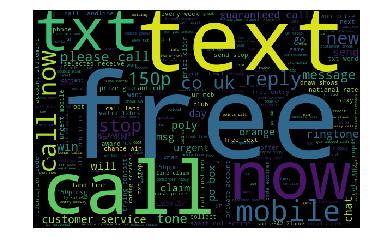

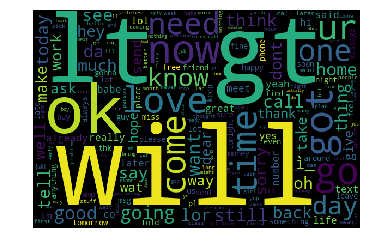

In [71]:
#Lets visualize with wordcloud!
def wordcloud_vis(df,spam_or_ham):
    words = ''
    for msg in df[df['b_labels']==spam_or_ham]['data']:
        msg = msg.lower()
        words += msg +' '
    wordcloud = WordCloud(width=600, height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

wordcloud_vis(df,1)
wordcloud_vis(df,0)       

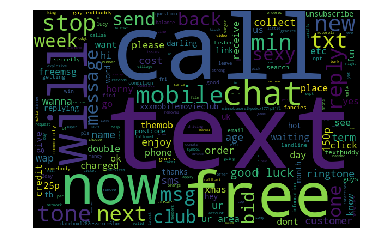

,labels,data,b_labels,predictions


In [76]:
df['predictions'] = model.predict(X)

#things that SHOULD be spam
sneaky_spam = df[(df['predictions'] == 0) & (df['b_labels'] == 1)]
wordcloud_vis(sneaky_spam,1)

#things that SHOULD NOT be spam
not_actually_spam = df[(df['predictions'] == 1) & (df['b_labels'] == 0)]
not_actually_spam

## NEAT! It seems that we have a very conservative classifier... ie it does not misclassify any texts that ARE NOT spam. However it does miss a few texts that actually are spam.